In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Is there is a duplicate records in this dataset ? if yes, then remove them

In [8]:
df.duplicated().sum()

0

In [11]:
df.shape

(8807, 12)

<AxesSubplot:>

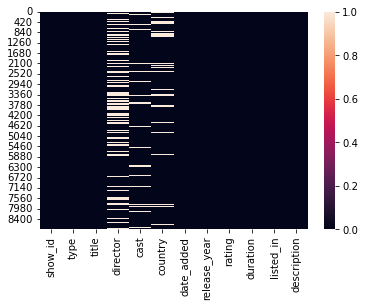

In [12]:
sns.heatmap(df.isnull())

In [13]:
df['director'].isnull().sum()

2634

In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#Q3. For ‘House of cards’ movie what is the show_id and who is the director of this movie ?

In [9]:
df.loc[df.title=='House of Cards']['show_id']

1059    s1060
Name: show_id, dtype: object

Q4. In which year highest number of TV shows and movies released ? show it in the
bar chart

<AxesSubplot:ylabel='release_year'>

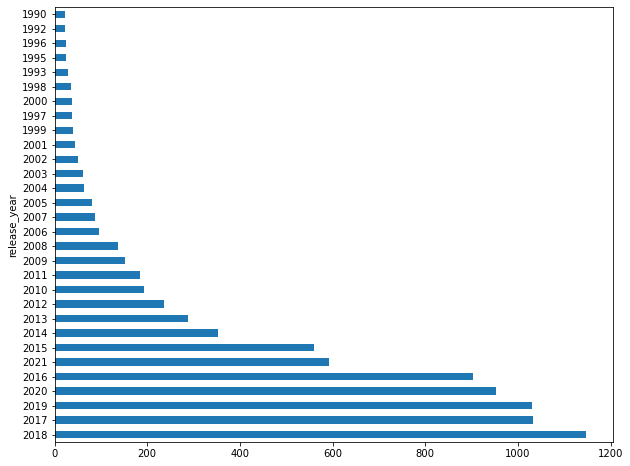

In [19]:
df.groupby('release_year').type.count().sort_values(ascending = False).head(30).plot(kind='barh', figsize=(10,8))

<AxesSubplot:xlabel='release_year', ylabel='count'>

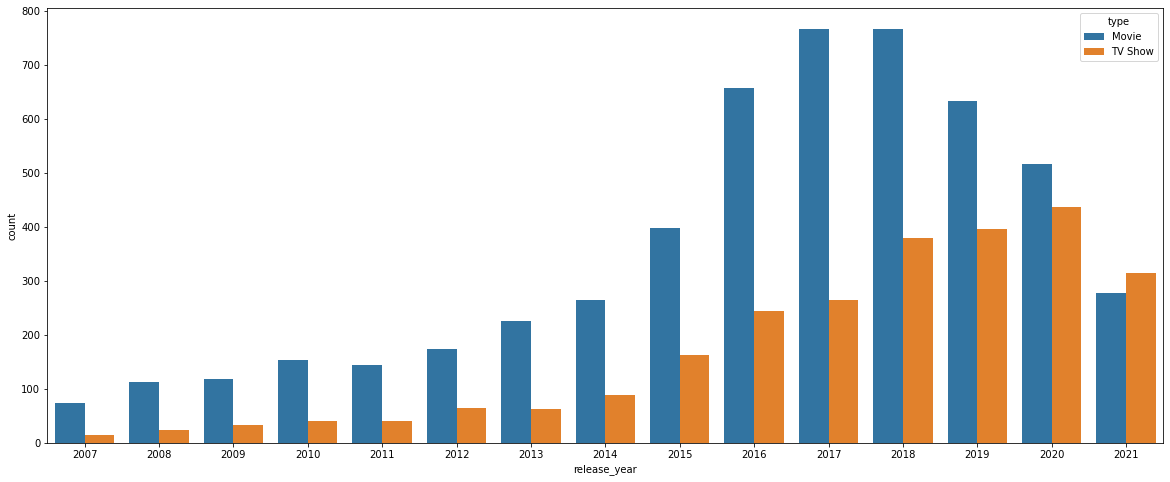

In [39]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x='release_year', hue='type', data = df.loc[df.release_year >=2007])

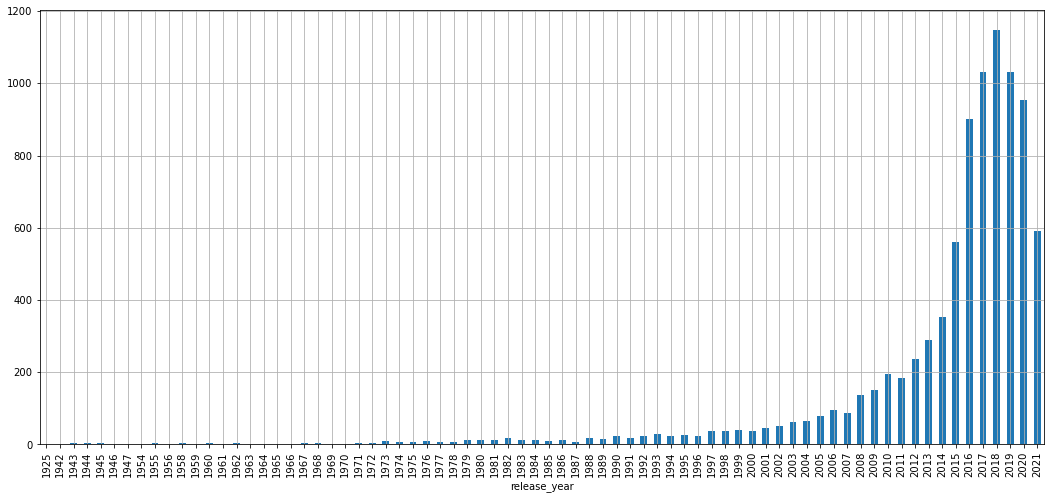

In [54]:
fig= plt.figure(figsize=(18,8))
(df.groupby('release_year')['show_id'].count()).plot.bar()
plt.grid()
plt.show()

In [43]:
df.groupby('release_year')['show_id'].count()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64

In [48]:
df[df['release_year']>2000].groupby('release_year')['show_id'].count()

release_year
2001      45
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, dtype: int64

<AxesSubplot:xlabel='release_year'>

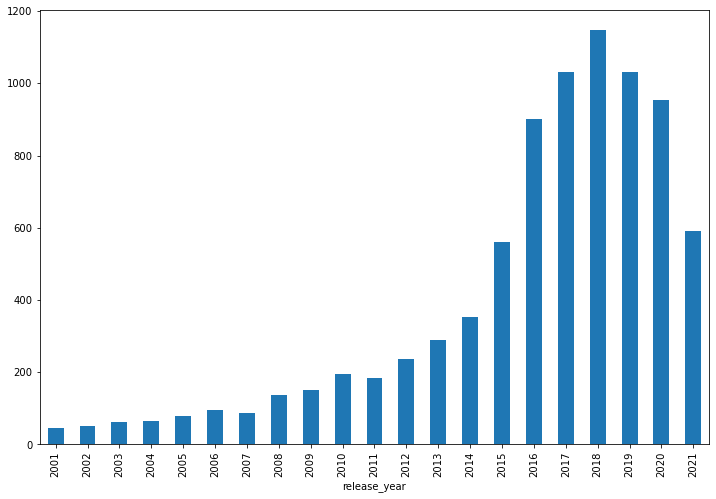

In [49]:
fig = plt.figure(figsize=(12,8))
(df[df['release_year']>2000].groupby('release_year')['show_id'].count()).plot.bar()

Q5. How many Movies and TV series are in the dataset ? Show it in bar char

Text(0, 0.5, 'Count')

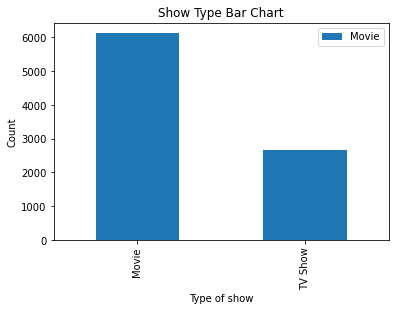

In [74]:
df1=df.groupby('type')['show_id'].count()

df1.plot.bar()
plt.title("Show Type Bar Chart")
plt.legend(df1.index)
plt.xlabel('Type of show')
plt.ylabel('Count')


In [69]:
df1

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

# Q6. How all the ‘movies’ are made in year 2020 

In [91]:
len(df[(df['type']=='Movie') & (df['release_year']==2020)])

517

In [41]:
len(df.query('type == "Movie" and release_year==2020'))

517

Q7. How many Titles are released in India only 

In [94]:
#df.head()
len(df[df['country']=='India'])

972

#### Q8. Top 10 directors who gave highest number of movies or web serie

In [113]:
df.groupby('director')['show_id'].count().sort_values(ascending=False).head(1).index[0]

'Rajiv Chilaka'

<AxesSubplot:ylabel='director'>

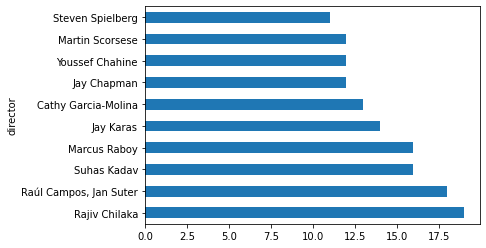

In [44]:
df.groupby('director')['show_id'].count().sort_values(ascending=False).head(10).plot(kind='barh',)

In [121]:
df['director'].value_counts().head(10).index[0]

'Rajiv Chilaka'

### Q9. Show the records where ‘category is movie’ and ‘type is comedy’ or ‘country is UK'

In [150]:
len(df[(df['type']=='Movie') & ((df['listed_in'].str.contains('Comed[y,ies]', case=False)) | (df['country']=='United Kingdom'))])

2171

In [168]:
df4=df[(df['type']=='Movie') & ((df['listed_in'].str.contains('Comed[y,ies]', case=False)) | (df['country'].str.contains('United Kingdom',case=False)))]

In [169]:
df4.to_csv('q91.csv')

### Q10. In how many movies / tv shows “Tom Cruise” was casted ?

In [173]:
#df.head()
df2 = df['cast'].dropna(axis = 0)

In [178]:
len(df2[df2.str.contains("Tom Cruise", case= False)])

2

In [176]:
df2.head()

1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5    Kate Siegel, Zach Gilford, Hamish Linklater, H...
6    Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
Name: cast, dtype: object

In [180]:
len(df[df['cast'].str.contains("Tom Cruise", case= False, na=False)])

2

### 11. What are the different Ratings provided by netflix ?

In [54]:
#df.head()
print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [184]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### Q12. How many movies got the ‘TV-14’ rating in ‘Canada’ ?

In [187]:
len(df[(df['rating']=='TV-14') & (df['country']=='Canada')])

26

In [189]:
df[(df['rating']=='TV-14') & (df['country'].str.contains('Canada',case=False))]['country'].value_counts()

Canada                                           26
United States, Canada                             5
Canada, United States                             5
Lebanon, Canada, France                           2
Canada, India                                     2
Canada, Nigeria, United States                    1
Spain, France, Canada, United States              1
Canada, Germany, South Africa                     1
Canada, France, Italy, Morocco, United States     1
Canada, United Kingdom                            1
India, Canada                                     1
Canada, United States, United Kingdom             1
Spain, Canada, United States                      1
United Kingdom, Canada, Japan                     1
Name: country, dtype: int64

### Q13. How many movies get ‘R’ rating in year ‘2019’ ?

In [192]:
len(df[(df['rating']=='R') & (df['release_year']==2019)])

39

In [222]:
df2=df.dropna()

In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        5332 non-null   object
 1   type           5332 non-null   object
 2   title          5332 non-null   object
 3   director       5332 non-null   object
 4   cast           5332 non-null   object
 5   country        5332 non-null   object
 6   date_added     5332 non-null   object
 7   release_year   5332 non-null   int64 
 8   rating         5332 non-null   object
 9   duration       5332 non-null   object
 10  listed_in      5332 non-null   object
 11  description    5332 non-null   object
 12  type_duration  5332 non-null   object
dtypes: int64(1), object(12)
memory usage: 583.2+ KB


### Q14. What is the max duration of Movie/Show in this dataset ?


In [55]:
# df2[['duration','type_duration']]=df2['duration'].str.split(' ',expand=True)

In [228]:
df2[['duration','type_duration']]

,duration,type_duration
7,125,min
8,9,Seasons
9,104,min
12,127,min
24,166,min
...,...,...
8801,96,min
8802,158,min
8804,88,min
8805,88,min


In [240]:
df2['duration']=df2['duration'].astype('int64')

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_11452/2619974361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration']=df2['duration'].astype('int64')


In [241]:
df2['duration'].sort_values(ascending=False)

2491    253
2487    237
166     229
7932    228
1019    224
       ... 
4104      1
7918      1
4284      1
6838      1
4991      1
Name: duration, Length: 5332, dtype: int64

In [242]:
df2['duration'].max()

253

In [251]:
df2[df2['duration']==(df2[df2['type_duration']=='Seasons']['duration'].max())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_duration
991,s992,Movie,One Like It,Marwan Nabil,"Riham Abdel Ghafour, Mohammed Aly Rizk, Hazem ...",Egypt,"April 23, 2021",2020,TV-G,15,"Dramas, Independent Movies, International Movies",This short film follows a day in the life of a...,min
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",Seasons
3709,s3710,Movie,ANIMA,Paul Thomas Anderson,Thom Yorke,United Kingdom,"June 27, 2019",2019,TV-PG,15,"Dramas, Independent Movies, Music & Musicals",In a short musical film directed by Paul Thoma...,min


### Q15. Which Individual Country has maximum number of TV Shows ?

In [255]:
df['country'].value_counts().index[0]

'United States'

### Q16. Find out the instances where category is ‘movie’ and type is ‘drama’ ?

In [258]:
len(df[(df['type']=='Movie') & (df['listed_in'].str.contains('Drama', case=False))])

2427

### Q17. Find out the instances where category is ‘TV Show’ and type is ‘Kids TV’ ?

In [262]:
df[(df['type']=='TV Show') & (df['listed_in'].str.contains("Kids", case=False))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_duration
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1,Kids' TV,Tayo speeds into an adventure when his friends...,Season
37,s38,TV Show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h...",Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3,Kids' TV,"A brave, energetic little boy with superhuman ...",Seasons
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,"September 16, 2021",2021,TV-Y7,1,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,Season
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6,Kids' TV,"In a place called Numberland, math adds up to ...",Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",Season
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1,Kids' TV,"With the mind of a human being, and the body o...",Season
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,Seasons
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,Seasons


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        8807 non-null   object
 1   type           8807 non-null   object
 2   title          8807 non-null   object
 3   director       6173 non-null   object
 4   cast           7982 non-null   object
 5   country        7976 non-null   object
 6   date_added     8797 non-null   object
 7   release_year   8807 non-null   int64 
 8   rating         8803 non-null   object
 9   duration       8804 non-null   object
 10  listed_in      8807 non-null   object
 11  description    8807 non-null   object
 12  type_duration  8804 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


In [269]:
df['date_added'].dropna(axis=0,inplace=True)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        8807 non-null   object
 1   type           8807 non-null   object
 2   title          8807 non-null   object
 3   director       6173 non-null   object
 4   cast           7982 non-null   object
 5   country        7976 non-null   object
 6   date_added     8797 non-null   object
 7   release_year   8807 non-null   int64 
 8   rating         8803 non-null   object
 9   duration       8804 non-null   object
 10  listed_in      8807 non-null   object
 11  description    8807 non-null   object
 12  type_duration  8804 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


In [320]:
df = pd.read_csv("netflix_titles.csv")

In [321]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [322]:
df = df.dropna(subset=['date_added'])

In [335]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [336]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [324]:
df['year_added']= df['date_added'].dt.year

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 962.2+ KB


In [326]:
df['year_added'].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [327]:
df2=df

In [337]:
df2["date_added"] = df2["date_added"].dt.strftime('%d/%m/%Y')

In [338]:
df2["date_added"].head()

0    25/09/2021
1    24/09/2021
2    24/09/2021
3    24/09/2021
4    24/09/2021
Name: date_added, dtype: object

In [340]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",13/09/2018,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,31/12/2019,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,15/02/2018,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,15/12/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",03/09/2016,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20/11/2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,07/01/2019,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,11/01/2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,01/11/2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,03/02/2019,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
